# Lecture 5: Pandas II and Matplotlib

March 17, 2025

## Recap: Pandas

- What new does it bring for us?

## Key packages

1. `pandas`: Data Manipulation and Analysis

   - pandas is the primary library for handling and manipulating structured data in Python.
   - Data Structures, Data Cleaning and Preparation, Time Series Support

2. `matplotlib`: Fundamental Plotting Library

   - Matplotlib is the foundational plotting library in Python, offering comprehensive control over plotting elements.
   - Flexibility, Broad Plot Types, Integration (pandas)
    
3. `seaborn`: Statistical Data Visualization
    
   - Built on top of Matplotlib, seaborn offers a more user-friendly interface for statistical plots.
   - Aesthetics, Easy Statistical Plots, Integration with pandas

## Pandas (cont') and other packages

- `seaborn` package [[link](https://seaborn.pydata.org)]:
  - *Seaborn is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with `pandas` data structures.*
  - *A high-level API for statistical graphics.*
- `zipfile`
  - *The ZIP file format is a common archive and compression standard. This module provides tools to create, read, write, append, and list a ZIP file.*
- `datetime`
  - *The datetime module supplies classes for manipulating dates and times.*

### Plots (more)

- configuration of plots

In [1]:
!pip install seaborn

In [1]:
import seaborn as sns
import pandas as pd
import zipfile
import numpy as np

import datetime

In [2]:
idx = pd.IndexSlice # for multi-indexing

In [4]:
# idx?

In [3]:
# Set the default style
plotconfig = {
    'style':'.',
    'grid':True,
    'markersize':5,
    'figsize':(10,4)
}

#### Simple `seaborn`

In [4]:
sns.get_dataset_names() # if empty list, try to update seaborn package

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
penguins = sns.load_dataset("penguins") # the dataset can be found online, but it should be already included in the seaborn package
# tips = sns.load_dataset("tips")

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

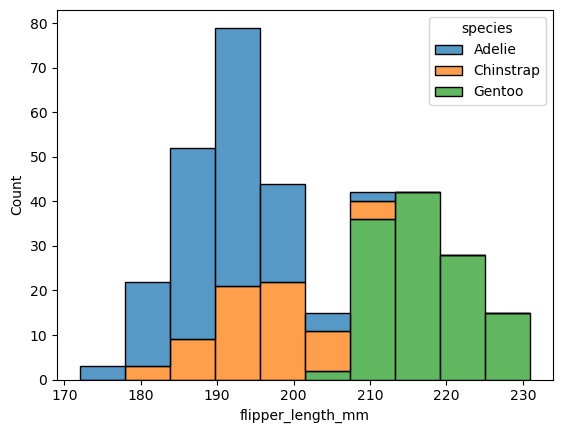

In [7]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

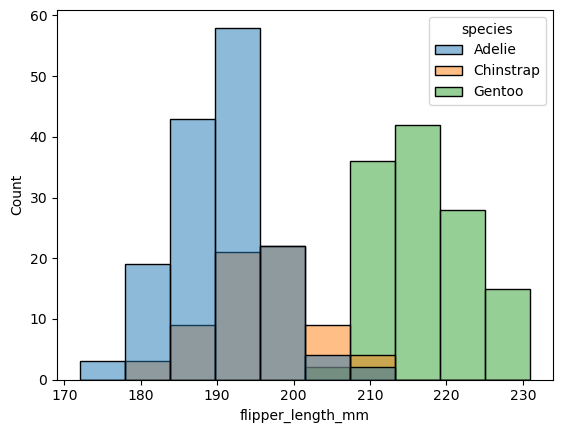

In [8]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

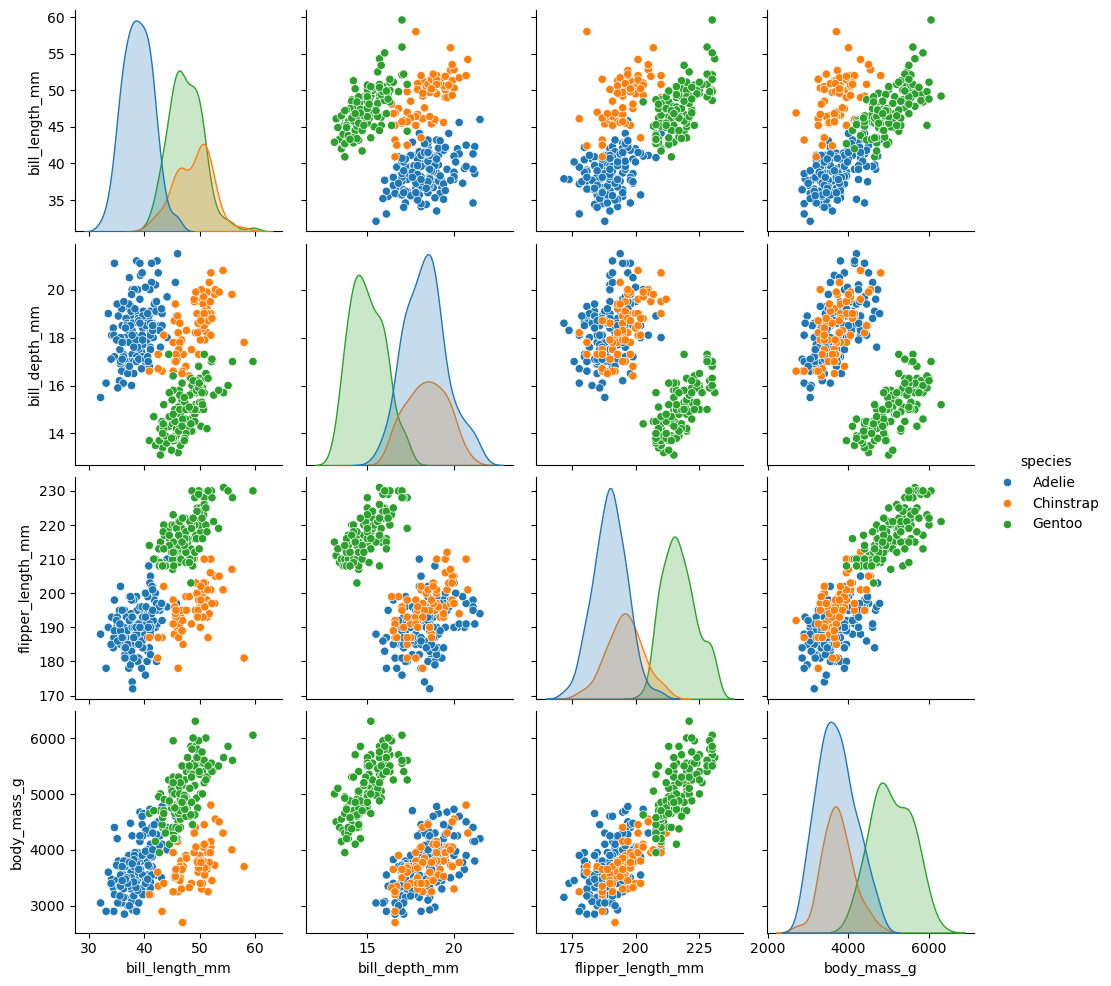

In [9]:
sns.pairplot(penguins, hue="species")

In [13]:
# sns.pairplot(penguins, hue="island")

#### Loading data from a .zip

In [10]:
with zipfile.ZipFile("data/covid.zip") as z:
    print("Files in the zip are: ", z.namelist())

Files in the zip are:  ['Covid data/CovidDeaths.csv', 'Covid data/CovidVaccinations.csv']


In [11]:
# Load the data, which is in a zip file
with zipfile.ZipFile("data/covid.zip") as z:
    z.extractall("data")

In [12]:
!ls data

Covid data           data_describtion.txt
covid.zip            train.csv


In [14]:
!ls data/Covid\ data

CovidDeaths.csv       CovidVaccinations.csv


#### Work with .csv or write a loop to work with the data

In [18]:
# Path to the zip file
zip_file_path = 'data/covid.zip'

# Open the zip file and list the files inside
with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())  # List all files in the zip archive

    # Specify the file you want to load
    csv_filename = 'Covid data/CovidDeaths.csv'
    csv_filename = z.namelist()[0]
    
    # Load the specific CSV file into a DataFrame
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display the DataFrame
print(df.head())

['Covid data/CovidDeaths.csv', 'Covid data/CovidVaccinations.csv']
  iso_code continent     location      date  population  total_cases  \
0      AFG      Asia  Afghanistan  24-02-20  40099462.0          5.0   
1      AFG      Asia  Afghanistan  25-02-20  40099462.0          5.0   
2      AFG      Asia  Afghanistan  26-02-20  40099462.0          5.0   
3      AFG      Asia  Afghanistan  27-02-20  40099462.0          5.0   
4      AFG      Asia  Afghanistan  28-02-20  40099462.0          5.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  ...  \
0        5.0                 NaN           NaN         NaN  ...   
1        0.0                 NaN           NaN         NaN  ...   
2        0.0                 NaN           NaN         NaN  ...   
3        0.0                 NaN           NaN         NaN  ...   
4        0.0                 NaN           NaN         NaN  ...   

   reproduction_rate  icu_patients  icu_patients_per_million  hosp_patients  \
0                N

## DONT FORGET TO UPDATE TO NEWER PYTHON WITH NEWER PANDAS

Loading data from a zip file

In [16]:
with zipfile.ZipFile("data/covid.zip") as z:
    with z.open("Covid data/CovidDeaths.csv") as f:
        # covid = pd.read_csv(f, index_col=["iso_code", "date"], parse_dates=["date"], date_parser=lambda d: pd.to_datetime(d, format="%d-%m-%y"))
        covid = pd.read_csv(f, index_col=["iso_code", "date"], parse_dates=["date"], date_format="%d-%m-%y")

        country_columns = ["continent", "location", "population"]
        countries = covid.groupby("iso_code").apply(
            lambda g: g.iloc[0][country_columns]
        )

        countries = countries[countries.apply(lambda row: len(row.name) == 3, axis=1)]
        countries.continent = countries.continent.astype("category")

        keep_covid_columns = [
            "new_cases",
            "new_deaths",
            "icu_patients",
            "hosp_patients",
        ]

        covid = covid[keep_covid_columns]
        covid = covid[covid.apply(lambda row: len(row.name[0]) == 3, axis=1)]

        covid = covid.sort_index()

        covid = covid.reset_index()

countries = countries

In [17]:
covid.head()

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
0,ABW,2020-03-13,2.0,NaN,NaN,NaN
1,ABW,2020-03-14,0.0,NaN,NaN,NaN
2,ABW,2020-03-15,0.0,NaN,NaN,NaN
3,ABW,2020-03-16,0.0,NaN,NaN,NaN
4,ABW,2020-03-17,1.0,NaN,NaN,NaN


In [18]:
countries.head()

,continent,location,population
iso_code,,,
ABW,North America,Aruba,106536.0
AFG,Asia,Afghanistan,40099462.0
AGO,Africa,Angola,34503774.0
AIA,North America,Anguilla,15753.0
ALB,Europe,Albania,2854710.0


In [22]:
covid.head()

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
0,ABW,2020-03-13,2.0,NaN,NaN,NaN
1,ABW,2020-03-14,0.0,NaN,NaN,NaN
2,ABW,2020-03-15,0.0,NaN,NaN,NaN
3,ABW,2020-03-16,0.0,NaN,NaN,NaN
4,ABW,2020-03-17,1.0,NaN,NaN,NaN


In [23]:
# Check if the data contains the Czech Republic
'CZE' in covid['iso_code'].unique()

True

In [25]:
czech_cases = covid.loc[covid['iso_code'] == 'CZE'].set_index('date')
slovak_cases = covid.loc[covid['iso_code'] == 'SVK'].set_index('date')

In [25]:
czech_cases.head()

,iso_code,new_cases,new_deaths,icu_patients,hosp_patients
date,,,,,
2020-03-01,CZE,3.0,NaN,NaN,NaN
2020-03-02,CZE,0.0,NaN,NaN,NaN
2020-03-03,CZE,2.0,NaN,NaN,NaN
2020-03-04,CZE,3.0,NaN,NaN,NaN
2020-03-05,CZE,4.0,NaN,NaN,NaN


In [35]:
covid[covid['iso_code'] == 'CZE']

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
45420,CZE,2020-03-01,3.0,NaN,NaN,NaN
45421,CZE,2020-03-02,0.0,NaN,NaN,NaN
45422,CZE,2020-03-03,2.0,NaN,NaN,NaN
45423,CZE,2020-03-04,3.0,NaN,NaN,NaN
45424,CZE,2020-03-05,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...
46336,CZE,2022-09-03,379.0,2.0,50.0,619.0
46337,CZE,2022-09-04,179.0,3.0,48.0,642.0
46338,CZE,2022-09-05,2761.0,6.0,57.0,751.0
46339,CZE,2022-09-06,2458.0,12.0,55.0,759.0


In [26]:
slovak_cases.head()

,iso_code,new_cases,new_deaths,icu_patients,hosp_patients
date,,,,,
2020-03-06,SVK,1.0,NaN,NaN,1.0
2020-03-07,SVK,0.0,NaN,NaN,2.0
2020-03-08,SVK,2.0,NaN,2.0,5.0
2020-03-09,SVK,2.0,NaN,2.0,5.0
2020-03-10,SVK,2.0,NaN,2.0,7.0


In [26]:
slovak_cases.shape, czech_cases.shape

((916, 5), (921, 5))

### Args / Kwargs

In [27]:
plotconfig

{'style': '.', 'grid': True, 'markersize': 5, 'figsize': (10, 4)}

<Axes: xlabel='date'>

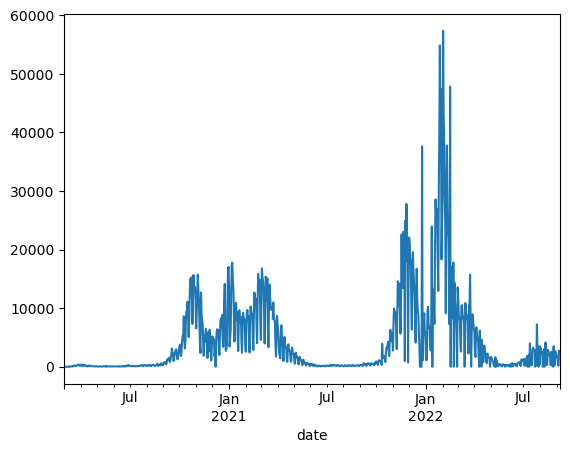

In [28]:
czech_cases['new_cases'].plot()

<Axes: xlabel='date'>

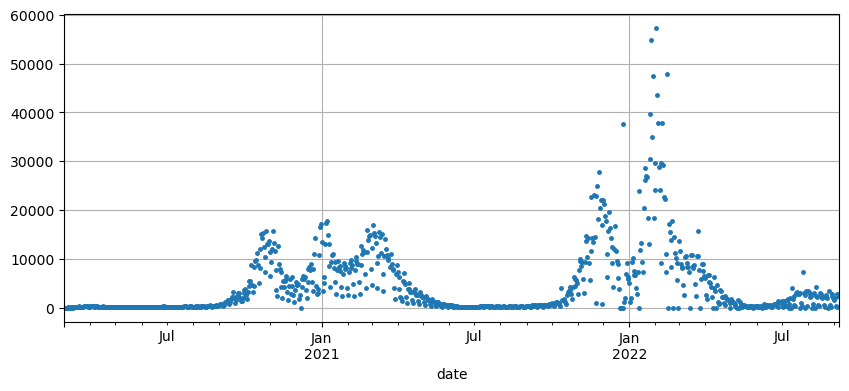

In [29]:
# all keyword arguments in plotconfig are passed to the plot function
czech_cases['new_cases'].plot(**plotconfig)

In [31]:
plotconfig

{'style': '.', 'grid': True, 'markersize': 5, 'figsize': (10, 4)}

## Indexing data
### Using `loc` - selecting based on index labels

In [30]:
czech_cases.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq=None)

In [31]:
datetime.date(year=2020, month=3, day=1)

datetime.date(2020, 3, 1)

In [32]:
czech_cases.loc[datetime.datetime(year=2020, month=12, day=24)]

iso_code             CZE
new_cases        14149.0
new_deaths         112.0
icu_patients       749.0
hosp_patients     4310.0
Name: 2020-12-24 00:00:00, dtype: object

In [33]:
czech_cases.loc['2020-12-24']

iso_code             CZE
new_cases        14149.0
new_deaths         112.0
icu_patients       749.0
hosp_patients     4310.0
Name: 2020-12-24 00:00:00, dtype: object

<Axes: xlabel='date'>

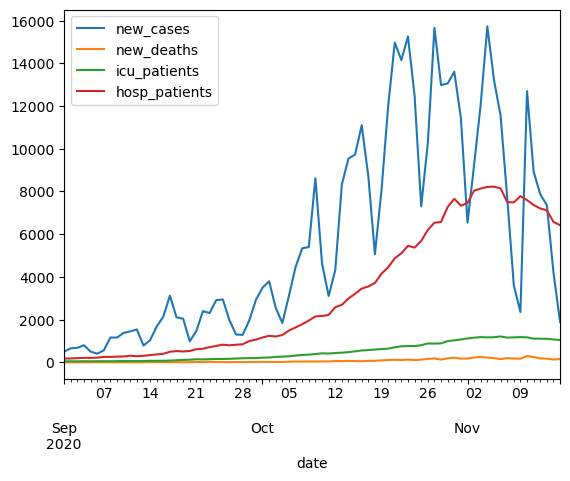

In [34]:
czech_cases.loc['2020-09-01':'2020-11-15'].plot()

### Sub-setting using `mask` - conditional on value of series

- Masking is a way to filter data by creating a "mask" (boolean array) that indicates which rows or columns should be included in a subset.
- If needed : using `~` to invert a mask

In [37]:
czech_cases[(czech_cases['new_cases'] >= 5000) & (czech_cases['new_cases'] < 15000)]

,iso_code,new_cases,new_deaths,icu_patients,hosp_patients
date,,,,,
2020-10-07,CZE,5338.0,35.0,346.0,1785.0
2020-10-08,CZE,5397.0,40.0,358.0,1956.0
2020-10-09,CZE,8617.0,36.0,389.0,2149.0
2020-10-13,CZE,8326.0,55.0,452.0,2692.0
2020-10-14,CZE,9543.0,66.0,478.0,2990.0
...,...,...,...,...,...
2022-04-04,CZE,6579.0,32.0,164.0,1866.0
2022-04-05,CZE,6729.0,29.0,167.0,1833.0
2022-04-06,CZE,5305.0,32.0,165.0,1740.0


<Axes: xlabel='date'>

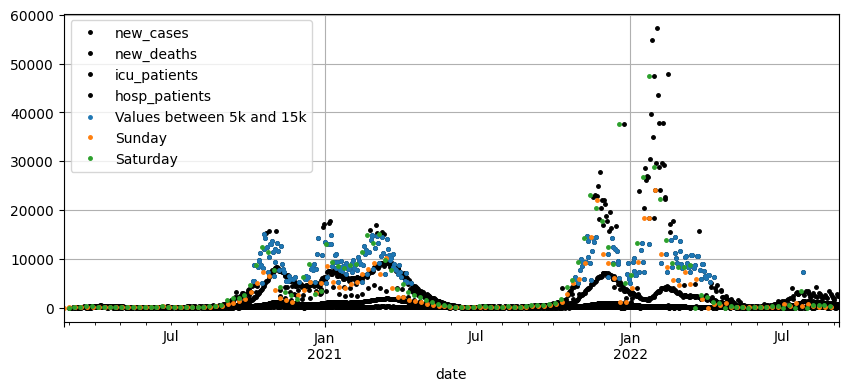

In [38]:
# ax is the axis object, which is used to plot multiple lines on the same plot
ax = czech_cases.plot(color="black", label="other values", legend=True, **plotconfig)

czech_cases.loc[
    (czech_cases["new_cases"] >= 5000) & (czech_cases["new_cases"] < 15000), "new_cases"
].plot(ax=ax, label="Values between 5k and 15k", legend=True, **plotconfig)

czech_cases.loc[
    czech_cases.index.weekday == 6, "new_cases"
].plot(ax=ax, label="Sunday", legend=True, **plotconfig)

czech_cases.loc[czech_cases.index.weekday == 5, "new_cases"].plot(ax=ax, label="Saturday", legend=True, **plotconfig)

In [39]:
covid

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
0,ABW,2020-03-13,2.0,NaN,NaN,NaN
1,ABW,2020-03-14,0.0,NaN,NaN,NaN
2,ABW,2020-03-15,0.0,NaN,NaN,NaN
3,ABW,2020-03-16,0.0,NaN,NaN,NaN
4,ABW,2020-03-17,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
201112,ZWE,2022-09-03,11.0,0.0,NaN,NaN
201113,ZWE,2022-09-04,8.0,0.0,NaN,NaN
201114,ZWE,2022-09-05,6.0,0.0,NaN,NaN
201115,ZWE,2022-09-06,13.0,0.0,NaN,NaN


In [40]:
CSSR = covid.loc[covid['iso_code'].isin(['SVK','CZE'])] 

In [41]:
CSSR.head()

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
45420,CZE,2020-03-01,3.0,NaN,NaN,NaN
45421,CZE,2020-03-02,0.0,NaN,NaN,NaN
45422,CZE,2020-03-03,2.0,NaN,NaN,NaN
45423,CZE,2020-03-04,3.0,NaN,NaN,NaN
45424,CZE,2020-03-05,4.0,NaN,NaN,NaN


## `MultiIndex`

In [42]:
CSSR = CSSR.set_index(['iso_code','date']) 

In [43]:
CSSR.head()

new_cases  new_deaths  icu_patients  hosp_patients
iso_code date                                                          
CZE      2020-03-01        3.0         NaN           NaN            NaN
         2020-03-02        0.0         NaN           NaN            NaN
         2020-03-03        2.0         NaN           NaN            NaN
         2020-03-04        3.0         NaN           NaN            NaN
         2020-03-05        4.0         NaN           NaN            NaN

In [44]:
CSSR.loc[('CZE','2020-12-24')]

new_cases        14149.0
new_deaths         112.0
icu_patients       749.0
hosp_patients     4310.0
Name: (CZE, 2020-12-24 00:00:00), dtype: float64

if slicing or multi-selecting use `idx = pd.IndexSlice`

In [45]:
idx = pd.IndexSlice

In [46]:
CSSR.loc[idx['CZE']]

,new_cases,new_deaths,icu_patients,hosp_patients
date,,,,
2020-03-01,3.0,NaN,NaN,NaN
2020-03-02,0.0,NaN,NaN,NaN
2020-03-03,2.0,NaN,NaN,NaN
2020-03-04,3.0,NaN,NaN,NaN
2020-03-05,4.0,NaN,NaN,NaN
...,...,...,...,...
2022-09-03,379.0,2.0,50.0,619.0
2022-09-04,179.0,3.0,48.0,642.0
2022-09-05,2761.0,6.0,57.0,751.0


In [47]:
CSSR.index

MultiIndex([('CZE', '2020-03-01'),
            ('CZE', '2020-03-02'),
            ('CZE', '2020-03-03'),
            ('CZE', '2020-03-04'),
            ('CZE', '2020-03-05'),
            ('CZE', '2020-03-06'),
            ('CZE', '2020-03-07'),
            ('CZE', '2020-03-08'),
            ('CZE', '2020-03-09'),
            ('CZE', '2020-03-10'),
            ...
            ('SVK', '2022-08-29'),
            ('SVK', '2022-08-30'),
            ('SVK', '2022-08-31'),
            ('SVK', '2022-09-01'),
            ('SVK', '2022-09-02'),
            ('SVK', '2022-09-03'),
            ('SVK', '2022-09-04'),
            ('SVK', '2022-09-05'),
            ('SVK', '2022-09-06'),
            ('SVK', '2022-09-07')],
           names=['iso_code', 'date'], length=1837)

In [48]:
CSSR.index.get_level_values('date')

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=1837, freq=None)

In [49]:
# IndexSlice is used to slice multi-indexed dataframes
czechoslovak_christmas = CSSR.loc[pd.IndexSlice[['CZE','SVK'],'2020-12-24':'2020-12-27'],:] #
czechoslovak_christmas

new_cases  new_deaths  icu_patients  hosp_patients
iso_code date                                                          
CZE      2020-12-24    14149.0       112.0         749.0         4310.0
         2020-12-25     4402.0        83.0         769.0         4386.0
         2020-12-26     2706.0        91.0         806.0         4651.0
         2020-12-27     3030.0        94.0         846.0         4966.0
SVK      2020-12-24     7354.0        46.0         190.0         1947.0
         2020-12-25     5064.0         0.0         197.0         2037.0
         2020-12-26     1182.0         0.0         202.0         2121.0
         2020-12-27     1086.0        41.0         218.0         2238.0

* alternatively use notation below with `slice()`

In [50]:
CSSR.loc[(['CZE','SVK'], slice(None))] # all dates, both countries

new_cases  new_deaths  icu_patients  hosp_patients
iso_code date                                                          
CZE      2020-03-01        3.0         NaN           NaN            NaN
         2020-03-02        0.0         NaN           NaN            NaN
         2020-03-03        2.0         NaN           NaN            NaN
         2020-03-04        3.0         NaN           NaN            NaN
         2020-03-05        4.0         NaN           NaN            NaN
...                        ...         ...           ...            ...
SVK      2022-09-03        0.0         0.0          24.0          364.0
         2022-09-04        0.0         0.0          26.0          380.0
         2022-09-05        0.0         0.0           NaN            NaN
         2022-09-06        0.0         0.0           NaN            NaN
         2022-09-07        0.0         0.0           NaN            NaN

[1837 rows x 4 columns]

In [51]:
# you can create custom multi-index, not only set it up using set_index 
pd.MultiIndex.from_arrays([[1,1],['a','2']])

MultiIndex([(1, 'a'),
            (1, '2')],
           )

In [52]:
# get specific level from multi-index
CSSR.index.get_level_values(level = 'iso_code') # or level = 0

Index(['CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE',
       ...
       'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK'],
      dtype='object', name='iso_code', length=1837)

In [53]:
CSSR.index.get_level_values(level = 'iso_code').unique() # unique values in the level

Index(['CZE', 'SVK'], dtype='object', name='iso_code')

In [54]:
# .reset_index enables reseting only specific level
CSSR.reset_index(level = 'date')

,date,new_cases,new_deaths,icu_patients,hosp_patients
iso_code,,,,,
CZE,2020-03-01,3.0,NaN,NaN,NaN
CZE,2020-03-02,0.0,NaN,NaN,NaN
CZE,2020-03-03,2.0,NaN,NaN,NaN
CZE,2020-03-04,3.0,NaN,NaN,NaN
CZE,2020-03-05,4.0,NaN,NaN,NaN
...,...,...,...,...,...
SVK,2022-09-03,0.0,0.0,24.0,364.0
SVK,2022-09-04,0.0,0.0,26.0,380.0
SVK,2022-09-05,0.0,0.0,NaN,NaN


## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

### Reshape `pd.Series` into `pd.DataFrame`: `.unstack`

In [ ]:
czechoslovak_christmas['new_cases']

In [ ]:
# unstack is used to pivot the data
czechoslovak_christmas['new_cases'].unstack(level = 'iso_code')

### Stack `pd.DataFrame` to `pd.Series`


In [ ]:
CSSR.stack()

### melting → long format

In [ ]:
CSSR = CSSR.reset_index()

In [ ]:
CSSR.head()

In [ ]:
CSSR.melt?

In [ ]:
CSSR.melt().head()

In [ ]:
CSSR.melt()['variable'].unique()

## Applying functions

#### Aggregation
- decreasing dimensionality

In [ ]:
czech_cases

In [ ]:
czech_cases[['new_cases', 'new_deaths']].mean()

In [ ]:
czech_cases.min()

In [ ]:
czech_cases.sum()

### Transforming
* preserves dimensionality and shape

In [ ]:
czech_cases = czech_cases.set_index('iso_code', append = True)

In [ ]:
czech_cases.diff(axis = 0)

In [ ]:
czech_cases.apply(np.log)

In [ ]:
czech_cases.cumsum()

In [ ]:
czech_cases.pct_change() # Warning: this will not work for the first row

In [ ]:
czech_cases.pct_change(fill_method=None)

#### Custom functions

In [ ]:
czech_cases.apply(lambda x: (x - np.mean(x)) / np.std(x))

## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


In [ ]:
countries.head()

In [ ]:
covid = covid.merge(countries, how = 'left', on = 'iso_code')

In [ ]:
covid.shape

In [ ]:
covid.head()

In [ ]:
covid.groupby('continent', observed=False).count() # Observed = False is used to include all categories in the grouping

In [ ]:
g = covid.groupby(['continent', 'date'], observed=False)

In [ ]:
g.groups.keys()

In [ ]:
g.groups.values()

In [ ]:
# get_group is used to get a specific group from the groupby object
g.get_group(('Europe', '2020-12-24'))

### Group By + Apply

In [ ]:
interesting_countries = ['Austria', 'Poland', 'Germany', 'Czechia', 'Slovakia', 'Hungary', 'France', 'Denmark', 'Sweden']

In [ ]:
some_countries = covid.loc[covid.location.isin(interesting_countries)]
some_countries['deaths_per_case'] = some_countries.new_deaths / some_countries.new_cases
some_countries

## Merging and joing datasets

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - alignment (along index or columns)
* `pd.merge` - combining data (along columns, by values)
    * `df.join` - merge on index


### Concatenate
![concatenate](./img/concatenate.png)

### Merge
![merge](./img/merge.png)



- good to know when working with TS: `merge_as_of`

## Rolling object

A `rolling` object is used for performing operations on a sliding window basis across a `DataFrame` or `Series`. 

This is particularly useful for time series analysis, where rolling operations (e.g., moving averages, sums, etc.) help smooth out data, identify trends, or calculate indicators.

Common Rolling Aggregations:

| Method | Description |
| ---- | ---- |
| mean() | Rolling mean (moving average) |
| sum() | Rolling sum |
| std() | Rolling standard deviation |
| min() | Rolling minimum |
| max() | Rolling maximum |
| apply(func) | Custom function application |
| corr() | Rolling correlation with another column |
| cov() | Rolling covariance with another column |

In [ ]:
plotconfig = {
    'style':'.',
    'grid':True,
    'markersize':5,
    'figsize':(12,5)
}

In [ ]:
ax = czech_cases.plot(label="original", **plotconfig, legend=True)
czech_cases.rolling(3).mean().plot(label="3 days rolling", ax=ax, legend=True)
czech_cases.rolling(5).mean().plot(label="5 days rolling", ax=ax, legend=True)
czech_cases.rolling(10).mean().plot(label="10 days rolling", ax=ax, **plotconfig, legend=True)